<a href="https://colab.research.google.com/github/Blaqadonis/Classification-Exam-Explore/blob/main/Odiaka_Chinonso_Homework2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [ ]:
!pip install wget

import wget
url = 'https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv'
filename = wget.download(url)
print(filename)

In [ ]:
df = pd.read_csv('housing.csv')

In [ ]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [ ]:
features = ['longitude',
'latitude',
'housing_median_age',
'total_rooms',
'total_bedrooms',
'population',
'households',
'median_income',
'median_house_value']
features

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'median_house_value']

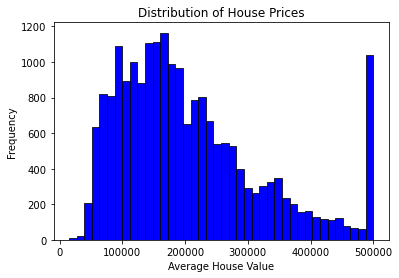

In [ ]:
plt.figure(figsize=(6, 4))

sns.histplot(df.median_house_value, bins=40, color='blue', alpha=1)
plt.ylabel('Frequency')
plt.xlabel('Average House Value')
plt.title('Distribution of House Prices')

plt.show()

#### Question 1
##### Find a feature with missing values. How many missing values does it have?

207
307
408
508

In [ ]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

'total_bedrooms' has 207 missing values, and is the ONLY feature with NaN values.

#### Question 2
##### What's the median (50% percentile) for variable 'population'?

1133
1122
1166
1188

In [ ]:
df.population.median()

1166.0

#### Question 3
##### We need to deal with missing values for the column from Q1.
##### We have two options: fill it with 0 or with the mean of this variable.
##### Try both options. For each, train a linear regression model without regularization using the code from the lessons.
##### For computing the mean, use the training only!
##### Use the validation dataset to evaluate the models and compare the RMSE of each option.
##### Round the RMSE scores to 2 decimal digits using round(score, 2)
##### Which option gives better RMSE?
##### Options:

##### With 0
##### With mean
##### Both are equally good

In [ ]:
df = df[features]
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0


In [ ]:
np.random.seed(42)
idx = np.arange(len(df))    #to mimic the index of df
np.random.shuffle(idx)

df_shuffled = df.iloc[idx]
df_shuffled

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
20046,-119.01,36.06,25.0,1505.0,NaN,1392.0,359.0,1.6812,47700.0
3024,-119.46,35.14,30.0,2943.0,NaN,1565.0,584.0,2.5313,45800.0
15663,-122.44,37.80,52.0,3830.0,NaN,1310.0,963.0,3.4801,500001.0
20484,-118.72,34.28,17.0,3051.0,NaN,1705.0,495.0,5.7376,218600.0
9814,-121.93,36.62,34.0,2351.0,NaN,1063.0,428.0,3.7250,278000.0
...,...,...,...,...,...,...,...,...,...
11284,-117.96,33.78,35.0,1330.0,201.0,658.0,217.0,6.3700,229200.0
11964,-117.43,34.02,33.0,3084.0,570.0,1753.0,449.0,3.0500,97800.0
5390,-118.38,34.03,36.0,2101.0,569.0,1756.0,527.0,2.9344,222100.0
860,-121.96,37.58,15.0,3575.0,597.0,1777.0,559.0,5.7192,283500.0


In [ ]:
n = len(df)

n_val = int(0.2 * n)
n_test = int(0.2 * n)
n_train = n - (n_val + n_test)


df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test = df_shuffled.iloc[n_train+n_val:].copy()

In [ ]:
df_train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
20046,-119.01,36.06,25.0,1505.0,NaN,1392.0,359.0,1.6812,47700.0
3024,-119.46,35.14,30.0,2943.0,NaN,1565.0,584.0,2.5313,45800.0
15663,-122.44,37.80,52.0,3830.0,NaN,1310.0,963.0,3.4801,500001.0
20484,-118.72,34.28,17.0,3051.0,NaN,1705.0,495.0,5.7376,218600.0
9814,-121.93,36.62,34.0,2351.0,NaN,1063.0,428.0,3.7250,278000.0
...,...,...,...,...,...,...,...,...,...
10292,-117.81,33.88,19.0,2265.0,283.0,904.0,279.0,9.2327,461300.0
16722,-120.68,35.48,15.0,2608.0,525.0,1351.0,502.0,2.7798,205800.0
11730,-120.91,38.98,13.0,7689.0,1415.0,3264.0,1198.0,3.6530,146800.0
5993,-117.72,34.09,36.0,1473.0,328.0,785.0,299.0,3.2566,151800.0


In [ ]:
df_val = df_val.reset_index(drop=True)
df_val

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-120.85,37.51,15.0,1131.0,285.0,728.0,281.0,1.5531,93100.0
1,-118.25,34.09,52.0,1866.0,470.0,1211.0,417.0,2.9350,189400.0
2,-122.02,37.31,34.0,2629.0,433.0,1301.0,431.0,6.0830,341400.0
3,-121.88,37.30,16.0,2692.0,749.0,1674.0,681.0,2.6763,191100.0
4,-122.27,37.56,17.0,3211.0,847.0,1553.0,812.0,4.9434,292100.0
...,...,...,...,...,...,...,...,...,...
4123,-119.12,36.05,27.0,1575.0,321.0,1063.0,317.0,2.1477,53900.0
4124,-116.90,33.65,15.0,652.0,149.0,248.0,97.0,2.1071,93800.0
4125,-120.71,38.34,16.0,1257.0,231.0,559.0,213.0,4.4531,144300.0
4126,-117.13,32.91,16.0,2715.0,581.0,1619.0,584.0,4.0000,154700.0


In [ ]:
df_test = df_test.reset_index(drop=True)
df_test

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-120.26,37.13,33.0,1239.0,250.0,648.0,227.0,2.0278,58800.0
1,-117.91,33.86,26.0,2296.0,570.0,1415.0,527.0,2.4732,165800.0
2,-118.36,34.04,48.0,1769.0,429.0,993.0,405.0,2.3214,139400.0
3,-118.15,34.69,32.0,1300.0,234.0,712.0,249.0,3.2500,107500.0
4,-119.97,38.93,24.0,856.0,185.0,388.0,108.0,3.1806,107200.0
...,...,...,...,...,...,...,...,...,...
4123,-117.96,33.78,35.0,1330.0,201.0,658.0,217.0,6.3700,229200.0
4124,-117.43,34.02,33.0,3084.0,570.0,1753.0,449.0,3.0500,97800.0
4125,-118.38,34.03,36.0,2101.0,569.0,1756.0,527.0,2.9344,222100.0
4126,-121.96,37.58,15.0,3575.0,597.0,1777.0,559.0,5.7192,283500.0


In [ ]:
y_train = np.log1p(df_train.median_house_value.values)
y_val = np.log1p(df_val.median_house_value.values)
y_test = np.log1p(df_test.median_house_value.values)

del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']

##### Replacing NaN values with zero.

In [ ]:
len(df_train)

12384

In [ ]:
df_train.total_bedrooms.isnull().sum()

207

In [ ]:
df_val.total_bedrooms.isnull().sum()

0

In [ ]:
df_test.total_bedrooms.isnull().sum()

0

In [ ]:
df_train.total_bedrooms = df_train.total_bedrooms.fillna(0)

In [ ]:
df_train.total_bedrooms.isnull().sum()

0

In [ ]:
df_train.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
dtype: int64

##### Linear Regression Without RegulariZation.

In [ ]:
print(len(y_train),',', len(df_train))

12384 , 12384


In [ ]:
df_train.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income'],
      dtype='object')

In [ ]:
def prepare_X(df):
    df = df.copy()

    df = df.fillna(0)
    X = df.values
    return X

In [ ]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])   #it is like join in pandas

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [ ]:
def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.sqrt(mse)

y_pred = w_0 + X_train.dot(w)

In [ ]:
X_train = prepare_X(df_train)
w_0, w = train_linear_regression(X_train, y_train)

score = rmse(y_train, y_pred)
y_pred = w_0 + X_train.dot(w)
print('train', round(score, 2))

X_val = prepare_X(df_val)
y_pred = w_0 + X_val.dot(w)
score = rmse(y_val, y_pred)
print('validation', round(score, 2))

train 0.72
validation 0.33


##### Replacing NaN values with mean.

In [ ]:
df_train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
20046,-119.01,36.06,25.0,1505.0,0.0,1392.0,359.0,1.6812
3024,-119.46,35.14,30.0,2943.0,0.0,1565.0,584.0,2.5313
15663,-122.44,37.80,52.0,3830.0,0.0,1310.0,963.0,3.4801
20484,-118.72,34.28,17.0,3051.0,0.0,1705.0,495.0,5.7376
9814,-121.93,36.62,34.0,2351.0,0.0,1063.0,428.0,3.7250


In [ ]:
df_train.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
dtype: int64

In [ ]:
df_train.total_bedrooms.mean()

524.5631459948321

In [ ]:
df_train.total_bedrooms = df_train.total_bedrooms.fillna(df_train.total_bedrooms.mean())
df_train.total_bedrooms

20046       0.0
3024        0.0
15663       0.0
20484       0.0
9814        0.0
          ...  
10292     283.0
16722     525.0
11730    1415.0
5993      328.0
15993     487.0
Name: total_bedrooms, Length: 12384, dtype: float64

In [ ]:
df_train.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
dtype: int64

##### Linear Regression Without RegulariZation.

In [ ]:
print(len(y_train),',',len(df_train))

12384 , 12384


In [ ]:
df_train.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income'],
      dtype='object')

In [ ]:
def prepare_X(df):
    df = df.copy()

    X = df.values
    return X
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])   #it is like join in pandas

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]
X_train = prepare_X(df_train)
w_0, w = train_linear_regression(X_train, y_train)

y_pred = w_0 + X_train.dot(w)
print('train', round(rmse(y_train, y_pred),2))

train 0.34


Very apparent that replacing NaN values with zero, or replacing them with mean, both work just fine. However, it seems like replacing with zero works slightly better.  

#### Question 4
##### Now let's train a regularized linear regression.
For this question, fill the NAs with 0.
Try different values of r from this list: [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10].
Use RMSE to evaluate the model on the validation dataset.
Round the RMSE scores to 2 decimal digits.
Which r gives the best RMSE?
If there are multiple options, select the smallest r.

Options:

0
0.000001
0.001
0.0001

##### Linear regression with regularization.

In [ ]:
df = pd.read_csv('housing.csv')

In [ ]:
df = df[features]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [ ]:
np.random.seed(42)
idx = np.arange(len(df))    #to mimic the index of df
np.random.shuffle(idx)

df_shuffled = df.iloc[idx]
n = len(df)

n_val = int(0.2 * n)
n_test = int(0.2 * n)
n_train = n - (n_val + n_test)


df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test = df_shuffled.iloc[n_train+n_val:].copy()

df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = np.log1p(df_train.median_house_value.values)
y_val = np.log1p(df_val.median_house_value.values)
y_test = np.log1p(df_test.median_house_value.values)

del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']

df_train.total_bedrooms = df_train.total_bedrooms.fillna(0)


In [ ]:
X_train = prepare_X(df_train)
X_val = prepare_X(df_val)

In [ ]:
def train_linear_regression_reg(X, y, r=0.0):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    reg = r * np.eye(XTX.shape[0])
    XTX = XTX + reg

    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [ ]:


for r in [0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]:
    w_0, w = train_linear_regression_reg(X_train, y_train, r=r)
    y_pred = w_0 + X_val.dot(w)
    print('%6s' %r, np.round(rmse(y_val, y_pred),2))

 1e-06 0.33
0.0001 0.33
 0.001 0.33
  0.01 0.33
   0.1 0.33
     1 0.33
     5 0.34
    10 0.34


In [ ]:
X_train = prepare_X(df_train)
w_0, w = train_linear_regression_reg(X_train, y_train, r=0.000001)

y_pred = w_0 + X_train.dot(w)
print('train', round(rmse(y_train, y_pred),2))

X_val = prepare_X(df_val)
y_pred = w_0 + X_val.dot(w)
print('val', round(rmse(y_val, y_pred),2))

train 0.34
val 0.33


 For regularization of this dataset, r=0.000001 is the best value.

#### Question 5
##### We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score.
Try different seed values: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9].
For each seed, do the train/validation/test split with 60%/20%/20% distribution.
Fill the missing values with 0 and train a model without regularization.
For each seed, evaluate the model on the validation dataset and collect the RMSE scores.
What's the standard deviation of all the scores? To compute the standard deviation, use np.std.
Round the result to 3 decimal digits (round(std, 3))
Note: Standard deviation shows how different the values are. If it's low, then all values are approximately the same. If it's high, the values are different. If standard deviation of scores is low, then our model is stable.

Options:

0.16
0.00005
0.005
0.15555

In [ ]:
df = df[features]
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0


In [ ]:
seed = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
n = len(df)
def prepare_X(df):
    df = df.copy()
    df = df.fillna(0)
    X = df.values
    return X
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])   #it is like join in pandas

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]
def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.sqrt(mse)
rmses = []


for seed in seed:
    np.random.seed(seed)
    idx = np.arange(len(df))    #to mimic the index of df
    np.random.shuffle(idx)
    df_shuffled = df.iloc[idx]
    df_shuffled = df_shuffled.reset_index(drop=True)
    n_val = int(0.2 * n)
    n_test = int(0.2 * n)
    n_train = n - (n_val + n_test)
    df_train = df_shuffled.iloc[:n_train].copy()
    df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
    df_test = df_shuffled.iloc[n_train+n_val:].copy()
    df_val = df_val.reset_index(drop=True)
    df_test = df_test.reset_index(drop=True)
    y_train = np.log1p(df_train.median_house_value.values)
    y_val = np.log1p(df_val.median_house_value.values)
    y_test = np.log1p(df_test.median_house_value.values) 
    del df_train['median_house_value']
    del df_val['median_house_value']
    del df_test['median_house_value']
    df_train = df_train.fillna(0)
    
    X_train = prepare_X(df_train)
    w_0, w = train_linear_regression(X_train, y_train)
    y_pred = w_0 + X_train.dot(w)
    score = rmse(y_train, y_pred)
    rmses.append(score)
    print('_________________________________________ Seed Value:',seed,'__________________________________________')
    print('train:', round(score, 2))
    
    X_val = prepare_X(df_val)
    y_pred = w_0 + X_val.dot(w)
    score = rmse(y_val, y_pred)
    print('validation', round(score, 2))

_________________________________________ Seed Value: 0 __________________________________________
train: 0.34
validation 0.34
_________________________________________ Seed Value: 1 __________________________________________
train: 0.34
validation 0.34
_________________________________________ Seed Value: 2 __________________________________________
train: 0.34
validation 0.33
_________________________________________ Seed Value: 3 __________________________________________
train: 0.34
validation 0.34
_________________________________________ Seed Value: 4 __________________________________________
train: 0.34
validation 0.34
_________________________________________ Seed Value: 5 __________________________________________
train: 0.34
validation 0.34
_________________________________________ Seed Value: 6 __________________________________________
train: 0.34
validation 0.35
_________________________________________ Seed Value: 7 __________________________________________
train: 0.34


In [ ]:
rmses

[0.3428936660920773,
 0.3434749539315191,
 0.34144289158719443,
 0.3424593094851197,
 0.3431873276109026,
 0.3418520717723793,
 0.33909315543550356,
 0.3399194290321636,
 0.33666582352110036,
 0.34097039572841054]

In [ ]:
round(np.std(rmses),3)

0.002

The standard deviation of all RMSE scores is 0.002. Option 3, 0.005, is the closest to it so my answer is option 3.

#### Question 6
##### Split the dataset like previously, use seed 9.
Combine train and validation datasets.
Fill the missing values with 0 and train a model with r=0.001.
What's the RMSE on the test dataset?
Options:

0.35
0.135
0.450
0.245

In [ ]:
np.random.seed(9)
idx = np.arange(len(df))    #to mimic the index of df
np.random.shuffle(idx)
df_shuffled = df.iloc[idx]
df_shuffled = df_shuffled.reset_index(drop=True)
n_val = int(0.2 * n)
n_test = int(0.2 * n)
n_train = n - (n_val + n_test)
df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test = df_shuffled.iloc[n_train+n_val:].copy()
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)
y_train = np.log1p(df_train.median_house_value.values)
y_val = np.log1p(df_val.median_house_value.values)
y_test = np.log1p(df_test.median_house_value.values) 
del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']

df_full_train = pd.concat([df_train,df_val])
df_full_train = df_full_train.fillna(0).reset_index(drop=True)
df_full_train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-121.80,38.67,10.0,2086.0,380.0,1073.0,378.0,4.5526
1,-117.97,33.66,22.0,3914.0,600.0,1871.0,607.0,5.8541
2,-124.25,40.28,32.0,1430.0,419.0,434.0,187.0,1.9417
3,-117.11,32.69,37.0,2395.0,627.0,2489.0,599.0,1.5933
4,-118.37,34.21,36.0,1392.0,326.0,1181.0,303.0,3.1563
...,...,...,...,...,...,...,...,...
16507,-122.30,38.31,34.0,1797.0,395.0,1162.0,407.0,3.4550
16508,-118.54,34.27,28.0,2309.0,300.0,931.0,302.0,6.7415
16509,-118.13,33.93,34.0,2122.0,517.0,1578.0,488.0,3.1496
16510,-118.37,34.11,42.0,5518.0,979.0,1863.0,957.0,8.5842


In [ ]:
df_full_train.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
dtype: int64

In [ ]:
X_full_train = prepare_X(df_full_train)
X_full_train

array([[-121.8   ,   38.67  ,   10.    , ..., 1073.    ,  378.    ,
           4.5526],
       [-117.97  ,   33.66  ,   22.    , ..., 1871.    ,  607.    ,
           5.8541],
       [-124.25  ,   40.28  ,   32.    , ...,  434.    ,  187.    ,
           1.9417],
       ...,
       [-118.13  ,   33.93  ,   34.    , ..., 1578.    ,  488.    ,
           3.1496],
       [-118.37  ,   34.11  ,   42.    , ..., 1863.    ,  957.    ,
           8.5842],
       [-118.37  ,   34.08  ,   52.    , ...,  543.    ,  213.    ,
           6.0338]])

In [ ]:
y_full_train = np.concatenate([y_train,y_val])

In [ ]:
def train_linear_regression_reg(X, y, r=0.0):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    reg = r * np.eye(XTX.shape[0])
    XTX = XTX + reg

    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [ ]:
w_0, w = train_linear_regression_reg(X_full_train, y_full_train, r=0.001)

In [ ]:
X_test = prepare_X(df_test)
y_pred = w_0 + X_test.dot(w)
print('RMSE on test data:', round(rmse(y_test, y_pred),2))

RMSE on test data: 0.35


The RMSE is 0.35. Option 1.